1. 데이터 구조확인
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

2. 기초 통계 요약
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std 

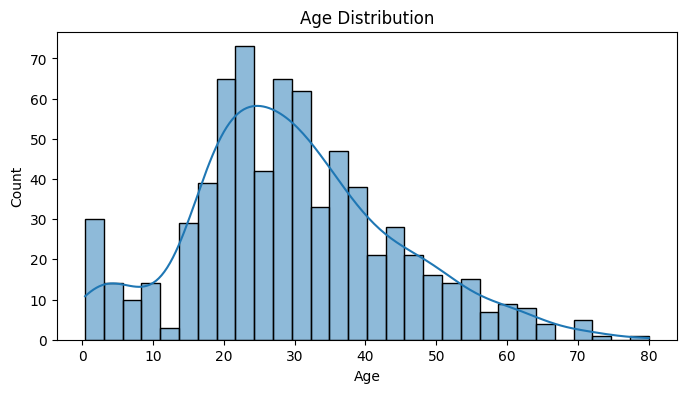


4. 이상치 확인


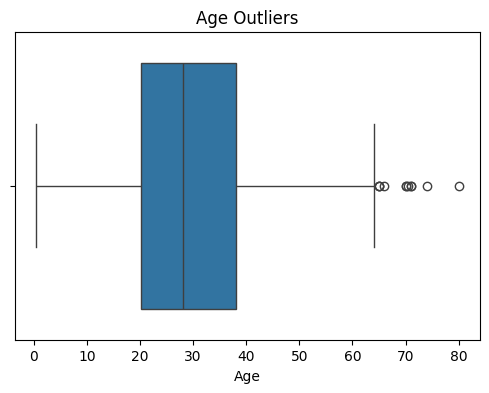


5. 성별에 따른 생존수


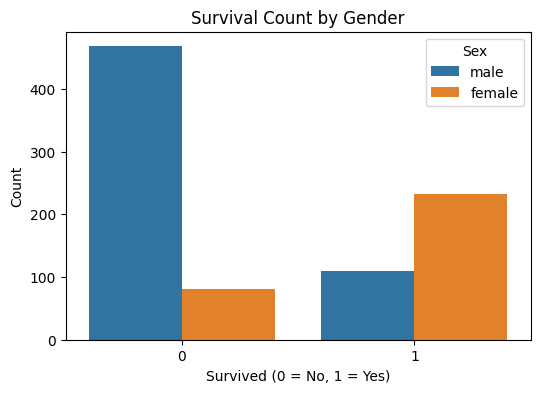


6. 수치형 변수 간 상관관계 히트맵


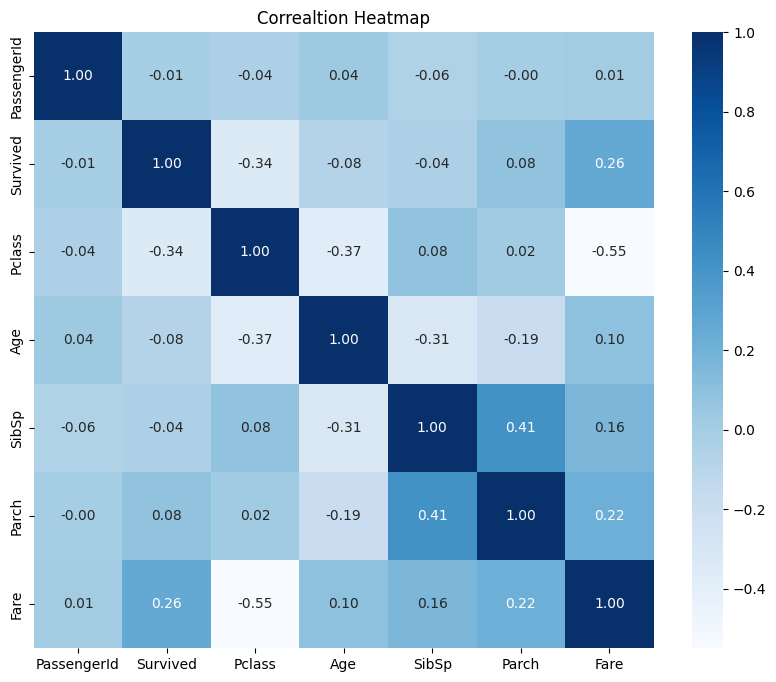


7. 수치형 변수 관계 시각화


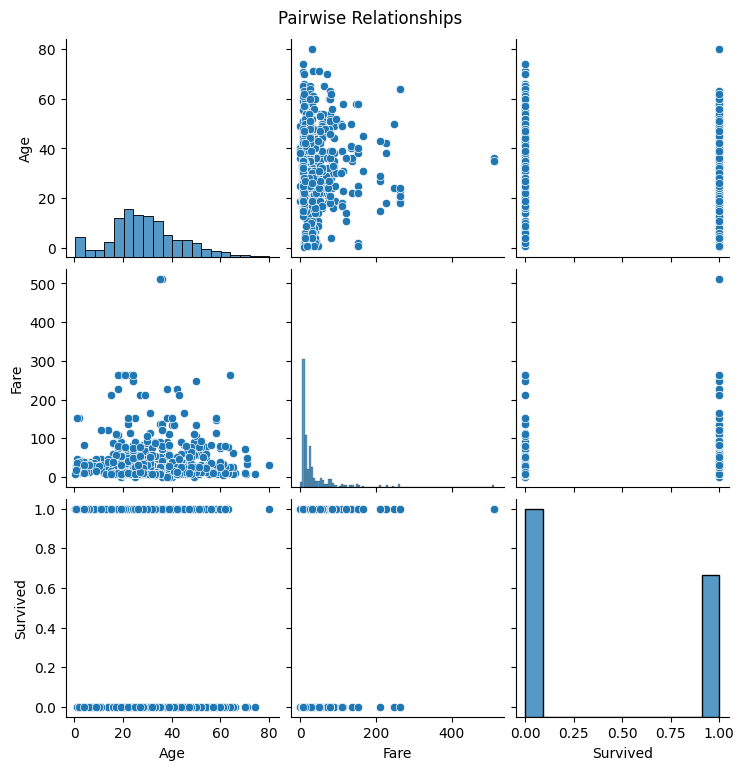

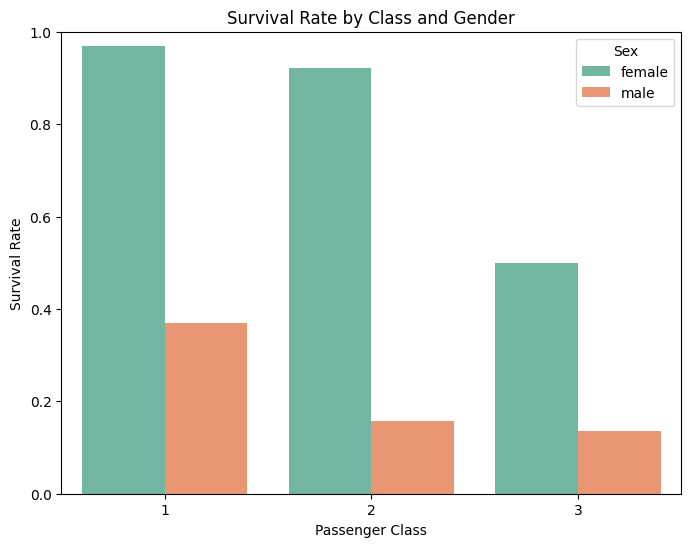

<ipython-input-21-f1e3279d3ec7>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=female_grouped, palette='coolwarm')


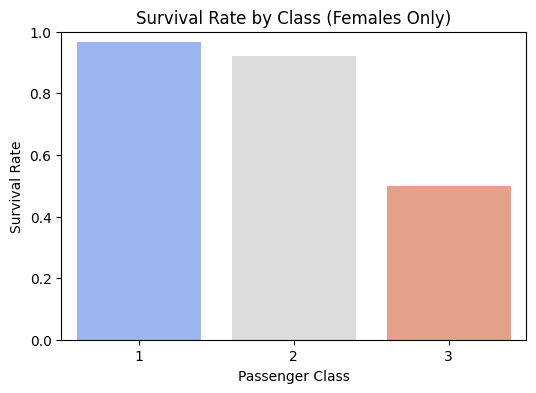

<ipython-input-21-f1e3279d3ec7>:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=male_grouped, palette='coolwarm')


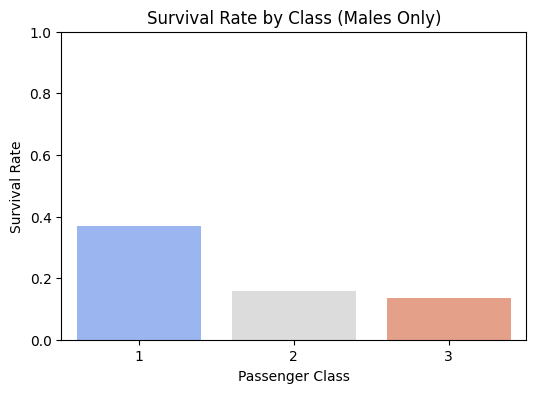

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Replace 'path/to/your/train.csv' with the actual path
file_path = '/content/drive/MyDrive/train.csv'
df = pd.read_csv(file_path)

print("1. 데이터 구조확인")
print(df.info())
print("\n2. 기초 통계 요약")
print(df.describe())
print("\n3. 결측치 개수 확인")
print(df.isnull().sum())
print("\n4. 이상치 확인")
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Age'])
plt.title('Age Outliers')
plt.show()
print("\n5. 성별에 따른 생존수")
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Count by Gender')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()
print("\n6. 수치형 변수 간 상관관계 히트맵")
numeric_df = df.select_dtypes(include='number')
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.title('Correaltion Heatmap')
plt.show()
print("\n7. 수치형 변수 관계 시각화")
sns.pairplot(df[['Age', 'Fare', 'Survived']].dropna())
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

# 8. 성별 + 객실 등급별 생존률 시각화
import numpy as np

# 생존률 계산을 위한 데이터프레임 생성
grouped = df.groupby(['Pclass', 'Sex'])['Survived'].mean().reset_index()

# 시각화 1: 객실 등급별, 성별 생존률 비교
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=grouped, palette='Set2')
plt.title('Survival Rate by Class and Gender')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.ylim(0, 1)
plt.show()

# 시각화 2: 여성만 대상으로 객실 등급별 생존률
female_grouped = df[df['Sex'] == 'female'].groupby('Pclass')['Survived'].mean().reset_index()
plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Survived', data=female_grouped, palette='coolwarm')
plt.title('Survival Rate by Class (Females Only)')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.ylim(0, 1)
plt.show()

# 시각화 3: 남성만 대상으로 객실 등급별 생존률
male_grouped = df[df['Sex'] == 'male'].groupby('Pclass')['Survived'].mean().reset_index()
plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Survived', data=male_grouped, palette='coolwarm')
plt.title('Survival Rate by Class (Males Only)')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.ylim(0, 1)
plt.show()


# **질문**

01. 탑승 항구(Embarked)별 생존률 


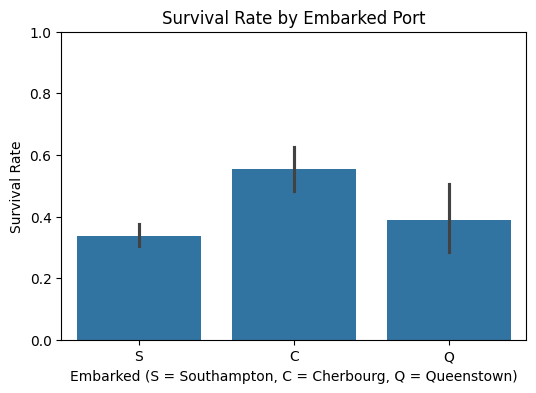


02. 항구별 객실 등급별 탑승자 수


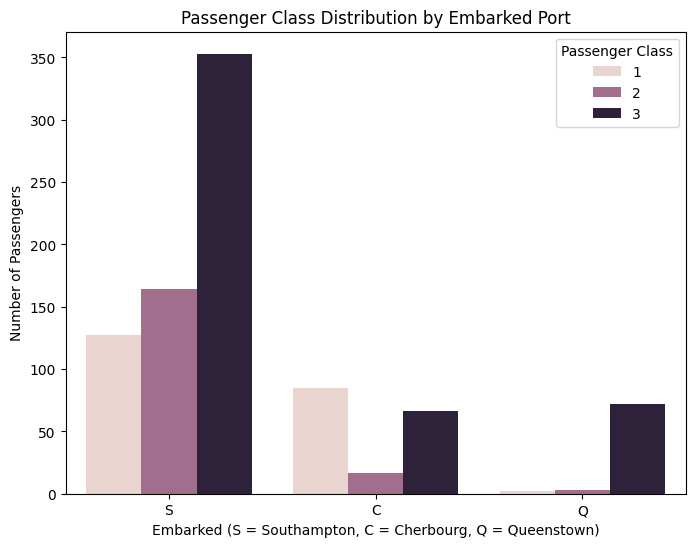


03. 동승자 유무에 따른 생존률


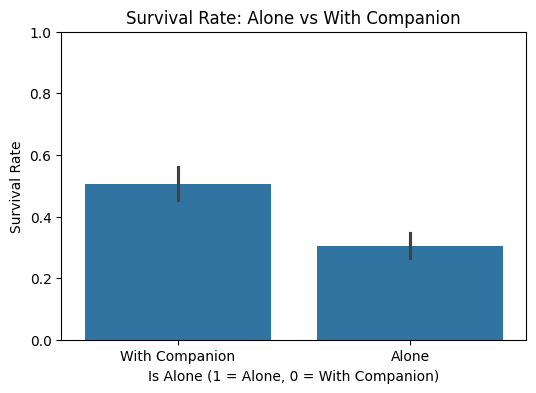


04. 가족 구성원에 따른 생존률


<ipython-input-18-a1bc620cb017>:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='FamilyCategory', y='Survived', data=df,


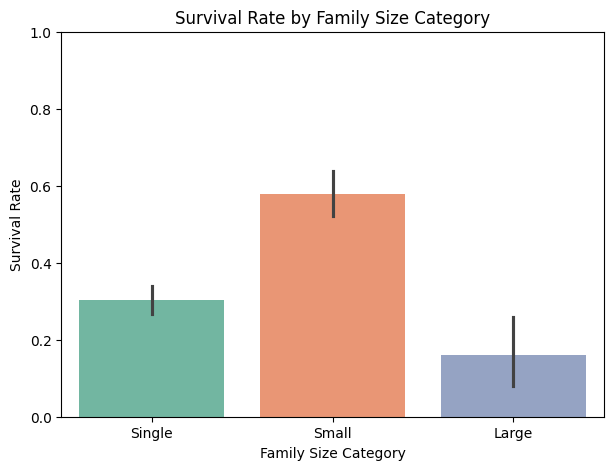


05. 객실 등급별 가족 그룹


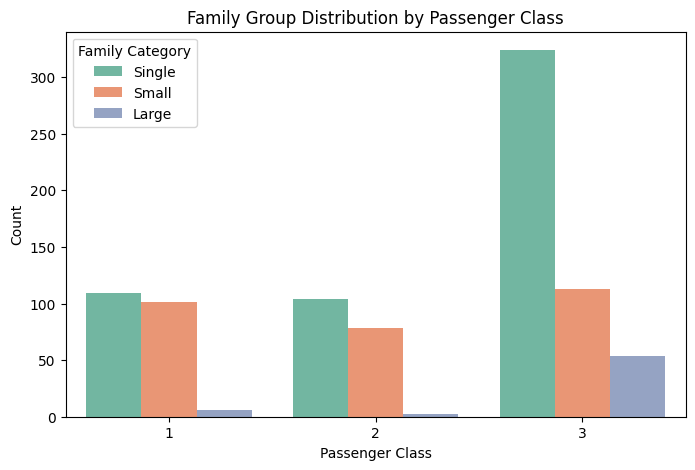

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Replace 'path/to/your/train.csv' with the actual path
file_path = '/content/drive/MyDrive/train.csv'
df = pd.read_csv(file_path)

# 1. 탑승 항구(Embarked)별 생존률 시각화
# 탑승 항구별로 생존률이 어떻게 달라지는지 시각화를 진행
# 생존률이 가장 높은 항구는 Cherbourg
print("01. 탑승 항구(Embarked)별 생존률 ")
plt.figure(figsize=(6, 4))
sns.barplot(x='Embarked', y='Survived', data=df, estimator='mean')
plt.title('Survival Rate by Embarked Port')
plt.xlabel('Embarked (S = Southampton, C = Cherbourg, Q = Queenstown)')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.show()

# 2. 항구별 객실 등급별 탑승자 수 집계
# Cherbourg 항구가 생존률이 가장 높은 이유를 찾고자 함
# Cherbourg 항구에서 1등급 승객들이 가장 많이 탑승했을 것으로 예상
# 결과, 1등급 승객이 가장 많은 항구는 Southampton이지만, 1등급 승객이 가장 높은 비율을 차지한 항구는 Cherbourg
print("\n02. 항구별 객실 등급별 탑승자 수")
plt.figure(figsize=(8, 6))
sns.countplot(x='Embarked', hue='Pclass', data=df)
plt.title('Passenger Class Distribution by Embarked Port')
plt.xlabel('Embarked (S = Southampton, C = Cherbourg, Q = Queenstown)')
plt.ylabel('Number of Passengers')
plt.legend(title='Passenger Class')
plt.show()

# 3. 동승자 유무에 따른 생존률
# 동승자 유무에 따라 생존률의 차이를 분석
# 결과, 동승자가 있을 때, 동승자가 없을 경우보다 생존률이 더 높음
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = df['FamilySize'].apply(lambda x: 1 if x == 1 else 0)

# 생존률 평균값 비교 시각화
print("\n03. 동승자 유무에 따른 생존률")
plt.figure(figsize=(6, 4))
sns.barplot(x='IsAlone', y='Survived', data=df)
plt.title('Survival Rate: Alone vs With Companion')
plt.xlabel('Is Alone (1 = Alone, 0 = With Companion)')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.xticks([0, 1], ['With Companion', 'Alone'])
plt.show()

# 4. 가족 구성원에 따른 생존률
# 3번의 결과를 바탕으로, 집단을 single(1명), small(2명~4명), large(5명 이상)으로 그룹화하여 분석
# 여성과 아이가 많을 것으로 예상되는 large 그룹이 생존률이 높을 것으로 예상
# 분석 결과, small 그룹이 생존률이 제일 높았음
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# 구간화 함수 정의
def categorize_family(size):
    if size == 1:
        return 'Single'
    elif 2 <= size <= 4:
        return 'Small'
    else:
        return 'Large'

df['FamilyCategory'] = df['FamilySize'].apply(categorize_family)
print("\n04. 가족 구성원에 따른 생존률")
plt.figure(figsize=(7, 5))
sns.barplot(x='FamilyCategory', y='Survived', data=df,
            order=['Single', 'Small', 'Large'], palette='Set2')
plt.title('Survival Rate by Family Size Category')
plt.xlabel('Family Size Category')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.show()

# 5. 객실등급에 따른 가족 구성 요소
# samll 그룹의 생존률이 가장 높은 이유를 찾고자 함
# 객실등급별로 가족 그룹을 분류함
# single, large 그룹의 경우 3등급의 비율이 압도적으로 높음
# 반면, small 그룹의 경우 1,2,3등급의 비율이 균등한 것을 확인
print("\n05. 객실 등급별 가족 그룹")
plt.figure(figsize=(8, 5))
sns.countplot(x='Pclass', hue='FamilyCategory', data=df, palette='Set2',
              order=[1, 2, 3], hue_order=['Single', 'Small', 'Large'])
plt.title('Family Group Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Family Category')
plt.show()




In [47]:

from google.colab import drive
drive.mount('/content/drive')

!git config --global user.email 'cooper200@naver.com'
!git config --global user.name 'kimyo01'
!git add titanic_0506.ipynb
!git commit -m '원하는 메시지 작성해주기'
!git push

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
fatal: pathspec 'titanic_0506.ipynb' did not match any files
On branch main

Initial commit

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	GDG-Study/
	"titanic_0506\341\204\213\341\205\264 \341\204\211\341\205\241\341\204\207\341\205\251\341\206\253"

nothing added to commit but untracked files present (use "git add" to track)
error: src refspec refs/heads/main does not match any
error: failed to push some refs to 'https://github.com/kimyo01/GDG-Study.git'
